<a href="https://colab.research.google.com/github/ovapichi/laboratorio-automatico/blob/main/An%C3%A1lisis_de_Celda_de_Carga_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requiere de 4 valores de tipo float en el siguiente orden:
1.Cuadriceps Derechos
2.Cuadriceps Izquierdos
3.Isquios Derechos
4.Isquios Izquierdos

Se integra con FPDF.

In [1]:
pip install tabulate

In [2]:
from tabulate import tabulate
# !git clone "https://github.com/ovapichi/laboratorio-automatico.git"

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# %run "/content/laboratorio-automatico/Fpdf.ipynb"

In [5]:
class Celda:
  def __init__(self,cuadriceps_der,cuadriceps_izq,isquios_der,isquios_izq):
    #Constructor
    self.cuadriceps_der=cuadriceps_der
    self.cuadriceps_izq=cuadriceps_izq
    self.isquios_der=isquios_der
    self.isquios_izq=isquios_izq

  def calcular_ratios(self, valor1, valor2):
    #calcula los ratios de cada grupo muscular
    return round(valor1/valor2,2)

  def procesar_simetria(self):
    #Hace una recomendación en función del ratio que obtiene de la función anterior.

    referencia_simetria=[['Referencia', ''], ['Menor a 0.9', 'Debilidad Derecha'],['Entre 0.9 y 1.1', 'Deseable'], ['Mayor a 1.1', 'Debilidad Izquierda']]
    absolutos=[['Grupo Muscular', 'Valor en kilogramos'],['Extensores Derechos', self.cuadriceps_der], ['Extensores Izquierdos', self.cuadriceps_izq], ['Flexores Derechos', self.isquios_der], ['Flexores Izquierdos', self.isquios_izq]]
    ratio_cuadriceps=self.calcular_ratios(self.cuadriceps_der,self.cuadriceps_izq)
    ratio_isquios=self.calcular_ratios(self.isquios_der,self.isquios_izq)

    print(tabulate(absolutos, headers='firstrow', tablefmt='fancy_grid'))
    print(f'Su valor de simetría de extensores es {ratio_cuadriceps}. \nSu valor de simetría de flexores es {ratio_isquios}.')
    print(tabulate(referencia_simetria, headers='firstrow', tablefmt="fancy_grid"))
    return ratio_cuadriceps, ratio_isquios

  def procesar_ratios(self):
    #Toma los ratios anteroposteriores y devuelve la recomendación en función de ellos. Si queda positivo el cuadriceps es mayor.
    ratio_derecho=self.calcular_ratios(self.isquios_der,self.cuadriceps_der)
    ratio_izquierdo=self.calcular_ratios(self.isquios_izq,self.cuadriceps_izq)

    print(f'Su H:Q ratio derecho es {ratio_derecho}. \nSu H:Q ratio izquierdo es {ratio_izquierdo}.')
    referencia_simetria=[['Referencia', ''], ['Mayor a 0.6', 'Deseable'], ['Menor a 0.6', 'Debilidad de flexores']]
    print(tabulate(referencia_simetria, headers='firstrow', tablefmt="fancy_grid"))
    return ratio_derecho, ratio_izquierdo

  def ejecutar(self):
    self.procesar_simetria()
    self.procesar_ratios()
    lista=self.procesar_simetria(), self.procesar_ratios()
    lista_nueva=[self.cuadriceps_der, self.cuadriceps_izq, self.isquios_der, self.isquios_izq]
    for i in lista:
      for e in i:
        lista_nueva.append(e)
    return lista_nueva

In [6]:
# pdf = PDF("p","cm","A4")
# pdf.add_page()
# pdf.set_font("Arial",size=10)

In [7]:
anita=Celda(50, 55, 30, 35)
anita2=Celda(55, 54, 42, 55)
headers=['Ratio extensores', 'Ratio flexores', 'Simetría derecha', 'Simetría izquierda']

#INGRESAS DOS TIRAS DE 8 VALORES ACTUAL ES EL DE AHORA Y EL EXPECTED ES EL VIEJO.
actual=anita.ejecutar()
expected=anita2.ejecutar()

╒═══════════════════════╤═══════════════════════╕
│ Grupo Muscular        │   Valor en kilogramos │
╞═══════════════════════╪═══════════════════════╡
│ Extensores Derechos   │                    50 │
├───────────────────────┼───────────────────────┤
│ Extensores Izquierdos │                    55 │
├───────────────────────┼───────────────────────┤
│ Flexores Derechos     │                    30 │
├───────────────────────┼───────────────────────┤
│ Flexores Izquierdos   │                    35 │
╘═══════════════════════╧═══════════════════════╛
Su valor de simetría de extensores es 0.91. 
Su valor de simetría de flexores es 0.86.
╒═════════════════╤═════════════════════╕
│ Referencia      │                     │
╞═════════════════╪═════════════════════╡
│ Menor a 0.9     │ Debilidad Derecha   │
├─────────────────┼─────────────────────┤
│ Entre 0.9 y 1.1 │ Deseable            │
├─────────────────┼─────────────────────┤
│ Mayor a 1.1     │ Debilidad Izquierda │
╘═════════════════╧════════

In [8]:
print(actual[4:])
print(expected[4:])
print(actual[:4])
print(expected[:4])

[0.91, 0.86, 0.6, 0.64]
[1.02, 0.76, 0.76, 1.02]
[50, 55, 30, 35]
[55, 54, 42, 55]


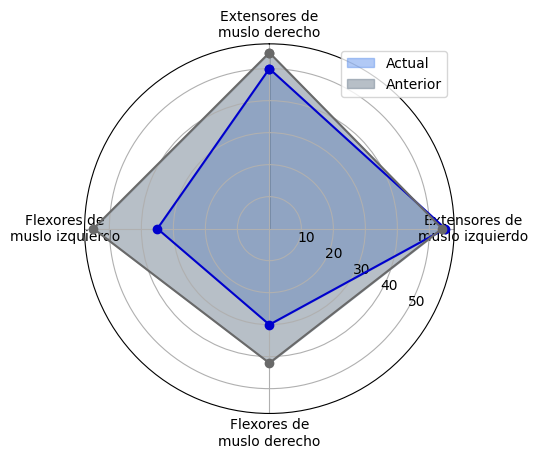

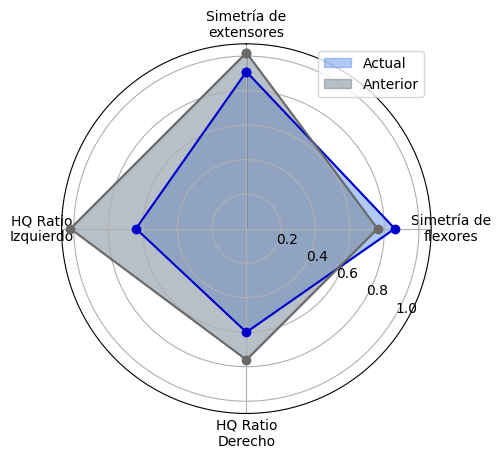

In [14]:
variables1=actual[:4]
variables2=expected[:4]
etiquetas = ["Extensores de\nmuslo derecho", "Extensores de\nmuslo izquierdo", "Flexores de\nmuslo derecho", "Flexores de\nmuslo izquierdo"]

# Asignar un ángulo a cada etiqueta
angulos = np.linspace(0, 2*np.pi, len(etiquetas), endpoint=False)

# Añadir el primer ángulo al final para cerrar el círculo
variables1 += variables1[:1]
variables2 += variables2[:1]
angulos = np.append(angulos, angulos[:1])

# Crear el gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angulos, variables1, marker='o', color='mediumblue')
ax.fill_between(angulos, variables1, alpha=0.5, label='Actual', color='cornflowerblue')

# Agregar la segunda serie de valores
ax.plot(angulos, variables2, marker='o', color='dimgrey')
ax.fill_between(angulos, variables2, alpha=0.5, label='Anterior', color='slategray')

# Personalizar el gráfico (opcional)
ax.set_theta_offset(np.pi/2)  # Ajustar la posición inicial del primer eje
ax.set_theta_direction(-1)    # Cambiar la dirección del eje polar (sentido antihorario)
ax.set_rlabel_position(90)    # Posición de las etiquetas radiales
ax.set_xticks(angulos[:-1])   # Colocar las etiquetas en los ángulos adecuados


# Ajustar la posición radial de las etiquetas
ax.set_rlabel_position(120)

# Colocar las etiquetas en los ángulos adecuados
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(etiquetas, ha='center')

ax.legend()
# Mostrar el gráfico
plt.savefig('polarabsoluto.png')
plt.show()

variables3=actual[4:]
variables4=expected[4:]
etiquetas = ["Simetría de\nextensores", "Simetría de\nflexores", "HQ Ratio\nDerecho", "HQ Ratio\nIzquierdo"]

# Asignar un ángulo a cada etiqueta
angulos = np.linspace(0, 2*np.pi, len(etiquetas), endpoint=False)

# Añadir el primer ángulo al final para cerrar el círculo
variables3 += variables3[:1]
variables4 += variables4[:1]
angulos = np.append(angulos, angulos[:1])

# Crear el gráfico polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angulos, variables3, marker='o', color='mediumblue')
ax.fill_between(angulos, variables3, alpha=0.5, label='Actual', color='cornflowerblue')

# Agregar la segunda serie de valores
ax.plot(angulos, variables4, marker='o', color='dimgrey')
ax.fill_between(angulos, variables4, alpha=0.5, label='Anterior', color='slategrey')

# Personalizar el gráfico (opcional)
ax.set_theta_offset(np.pi/2)  # Ajustar la posición inicial del primer eje
ax.set_theta_direction(-1)    # Cambiar la dirección del eje polar (sentido antihorario)
ax.set_rlabel_position(90)    # Posición de las etiquetas radiales
ax.set_xticks(angulos[:-1])   # Colocar las etiquetas en los ángulos adecuados


# Ajustar la posición radial de las etiquetas
ax.set_rlabel_position(120)

# Colocar las etiquetas en los ángulos adecuados
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(etiquetas, ha='center')

ax.legend()
# Mostrar el gráfico
plt.savefig('polarrelativo.png')
plt.show()